In [54]:
import pyforest

# Steps involved in Model Building
1. Understanding Problem statement
2. Data Gathering 
3. Data Cleaning
4. Sampling (Test Train)
5. Testing on Train Data
6. Improvements

In [1]:
lcn=pd.read_csv(r"LungCapData.csv")
lcn.head()

<IPython.core.display.Javascript object>

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [2]:
lcn.shape

(725, 6)

In [3]:
lcn.size

4350

## 2. Data Mining

In [4]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

#### Categorical to Numerical

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [6]:
lcn.Gender= le.fit_transform(lcn.Gender)

In [7]:
lcn.Smoke= le.fit_transform(lcn.Smoke)
lcn.Caesarean= le.fit_transform(lcn.Caesarean)

In [8]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
lcn_train, lcn_test = train_test_split(lcn, test_size=0.2)

In [11]:
lcn_train.shape

(580, 6)

In [12]:
lcn_train_x= lcn_train.iloc[:,1:]
lcn_train_y= lcn_train.iloc[:,0]

In [13]:
lcn_train_x.shape,lcn_train_y.shape

((580, 5), (580,))

In [14]:
lcn_test_x= lcn_test.iloc[:,1:]
lcn_test_y= lcn_test.iloc[:,0]

In [15]:
lcn_test_x.shape,lcn_test_y.shape

((145, 5), (145,))

###### Steps Involved
1. Import Function for Model to Build
2. Create Object of that Particular Function ()
3. Run Fit command on Train Data
4. Now Predict Data for both Train and Test 
5. Test Data score

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression() # Giving Name to Model by creating Object

In [18]:
reg.fit(lcn_train_x,lcn_train_y) # Fitting Model

LinearRegression()

In [19]:
pred_train=reg.predict(lcn_train_x)      # To predict Data
pred_test= reg.predict(lcn_test_x)

In [20]:
reg.coef_ # There are Slopes
# Ther coef which we are getting are in same oreder as in columns

array([ 0.15484283,  0.27054778, -0.69770823,  0.37112227, -0.19115852])

In [21]:
reg.intercept_       # B0

-11.648639430223998

In [22]:
# Evaluate Performance
Rsquare = reg.score(lcn_train_x,lcn_train_y)
Rsquare

0.8560780434352688

In [23]:
N=lcn_train_x.shape[0]   # Use N and K for Train Data Only

K=lcn_train_x.shape[1]

Adjusted_R2=1-((1-Rsquare)*(N-1)/(N-K-1))
Adjusted_R2

0.8548243678554367

In [24]:
0.85777-0.85653 # Difference between R2 and Adjusted R2

0.0012400000000000189

In [25]:
error_train= lcn_train_y- pred_train
error_test = lcn_test_y- pred_test

#### Note : Assumptions are only checked on TRAIN data
1. Mean Error is Zero

In [26]:
error_train.mean() # This values is very very close to zero

-2.1232058257141787e-15

In [27]:
lcn_train_x.corr()

,Age,Height,Smoke,Gender,Caesarean
Age,1.000000,0.832930,0.187075,-0.021625,0.082317
Height,0.832930,1.000000,0.177533,0.151299,0.062726
Smoke,0.187075,0.177533,1.000000,-0.013805,0.072062
Gender,-0.021625,0.151299,-0.013805,1.000000,-0.005395
Caesarean,0.082317,0.062726,0.072062,-0.005395,1.000000


2. Error should Normally distributed 

In [28]:
from scipy.stats import jarque_bera
jarque_bera(error_train)    # Since Pvalue>0.05 so H0 Rejected hence Data is 

Jarque_beraResult(statistic=3.8414163606263245, pvalue=0.14650317472043473)

In [29]:
error_train.mean()-error_train.median()

-0.057375811100131804

In [30]:
error_train.skew()

-0.06786287515290595

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

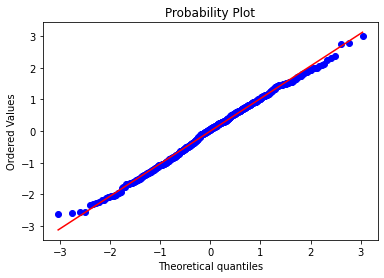

In [31]:
# Probability plot
fig=plt.figure()
stats.probplot(error_train, plot=plt)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

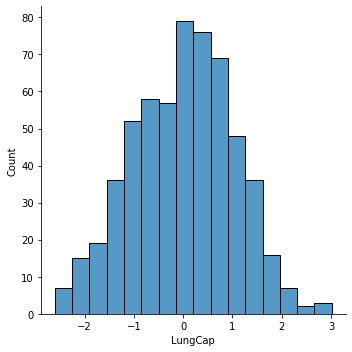

In [32]:
sns.displot(error_train)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

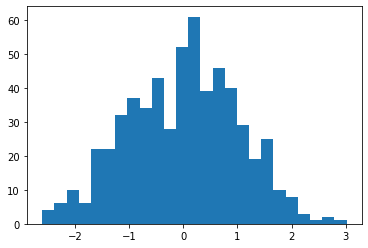

In [33]:
plt.hist(error_train,bins=25)
plt.show()

<IPython.core.display.Javascript object>

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LungCap', ylabel='Density'>

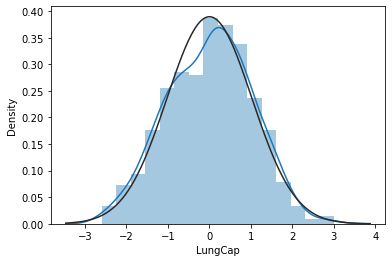

In [34]:
from scipy.stats import norm

sns.distplot(error_train,fit=norm)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

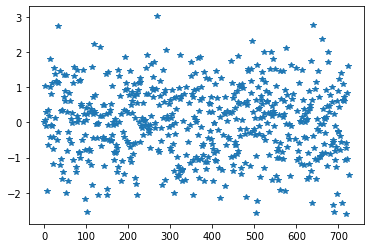

In [35]:
plt.plot(error_train ,"*") # Scatter plot
plt.show()                 # No patter amoung data errors

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

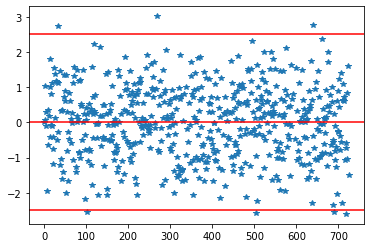

In [36]:
plt.plot(error_train ,"*")# Scatter plot
plt.axhline(y= error_train.mean(),color='r')
plt.axhline(y= 2.5,color='r')
plt.axhline(y= -2.5,color='r')
plt.show()                     # No pattern amoung data errors

In [37]:
Act_vs_pred=pd.DataFrame({"Predicted": pred_train,"Actual": lcn_train_y,"Difference":(pred_train-lcn_train_y)})
Act_vs_pred.sample(10)

<IPython.core.display.Javascript object>

,Predicted,Actual,Difference
690,6.983437,4.425,2.558437
383,9.140333,8.000,1.140333
236,5.171880,5.725,-0.553120
648,7.022416,6.825,0.197416
531,7.903299,8.500,-0.596701
72,3.796684,5.125,-1.328316
712,2.793789,3.425,-0.631211
301,7.669955,6.850,0.819955
49,6.472126,7.350,-0.877874
638,7.323066,5.025,2.298066


<IPython.core.display.Javascript object>

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

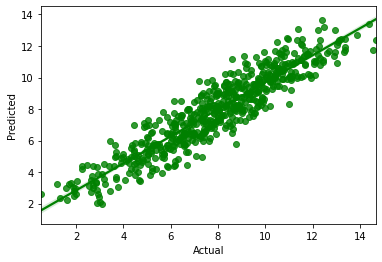

In [38]:
sns.regplot("Actual","Predicted",data=Act_vs_pred,color='g')      # X Must be Actual and Y must be Predicated since Fixed
plt.show()                # Here we can Observe Homoscidacity i.e. Varience around Reg line is same not Vary Much 

In [39]:
MAE= np.mean(np.abs(error_test))
MAE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7865567451739074

In [40]:
MSE=np.mean(np.square(error_test))
MSE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9700121790268299

In [41]:
RMSE= np.sqrt(MSE)
RMSE

<IPython.core.display.Javascript object>

0.9848919631242962

In [42]:
MAPE= np.mean(np.abs(error_test*100/ lcn_test_y))
MAPE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

12.075732742401755

In [43]:
ACC = 100-MAPE
ACC

87.92426725759825

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_absolute_error(lcn_test_y,pred_test),"MAE")
print(mean_squared_error(lcn_test_y,pred_test),"MSE")
print(mean_squared_error(lcn_test_y,pred_test,squared=False),"RMSE")

0.786556745173908 MAE
0.9700121790268296 MSE
0.9848919631242959 RMSE


#### Property Price 

In [55]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
pa=pd.read_csv(r"C:\Users\AKSHAY\Downloads\Property_Price_Train.csv")
pa.head()

<IPython.core.display.Javascript object>

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
pa.shape

(1459, 81)

In [58]:
pa.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

In [59]:
pa.isna().sum().sort_values(ascending=False).head(30)

Pool_Quality             1452
Miscellaneous_Feature    1405
Lane_Type                1368
Fence_Quality            1178
Fireplace_Quality         689
Lot_Extent                259
Garage_Condition           81
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Exposure_Level             38
BsmtFinType2               38
BsmtFinType1               37
Basement_Condition         37
Basement_Height            37
Brick_Veneer_Area           8
Brick_Veneer_Type           8
Electrical_System           1
Utility_Type                0
Remodel_Year                0
Building_Class              0
Foundation_Type             0
Exterior_Condition          0
Exterior_Material           0
Exterior2nd                 0
Exterior1st                 0
Roof_Quality                0
Roof_Design                 0
Construction_Year           0
dtype: int64

In [60]:
pa.columns[pa.isna().sum() *100/pa.shape[0] > 40] # Nulls Greater than 40 % 

Index(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature'],
      dtype='object')

In [61]:
pa.drop(['Lane_Type', 'Fireplace_Quality', 'Pool_Quality', 'Fence_Quality',
       'Miscellaneous_Feature'],axis=1,inplace=True)

In [62]:
pa.fillna({'Basement_Height':'TA','Exposure_Level':'No','BsmtFinType1':'Unf','BsmtFinType2':'Unf','Electrical_System':'SBrkr',
           'Garage':'Attchd','Garage_Finish_Year':'Unf','Garage_Quality':'TA','Basement_Condition':'TA',
          'Garage_Condition':'TA',
           'Brick_Veneer_Type':'None'},inplace=True)

In [63]:
for i in ['Lot_Extent','Garage_Built_Year','Brick_Veneer_Area']:
    pa[i]=pa[i].fillna(pa[i].median())

pa.Basement_Height.fillna('TA' , inplace = True)
pa.Exposure_Level.fillna('No' , inplace = True)
pa.BsmtFinType1.fillna('Unf' , inplace = True)
pa.BsmtFinType2.fillna('Unf' , inplace = True)
pa.Electrical_System.fillna('SBrkr' , inplace = True)
pa.Garage.fillna('Attchd' , inplace = True)
pa.Garage_Finish_Year.fillna('Unf' , inplace = True)
pa.Garage_Quality.fillna('TA' , inplace = True)
pa.Garage_Condition.value_counts()
pa.Basement_Condition.fillna('TA' , inplace = True)

pa.Lot_Extent.fillna(pa.Lot_Extent.median() , inplace = True)
pa.Garage_Built_Year.fillna(pa.Garage_Built_Year.median() , inplace = True)
pa.Brick_Veneer_Area.fillna(pa.Brick_Veneer_Area.median() , inplace = True)

In [64]:
pa.isna().sum().sort_values(ascending=False).head(5)

Sale_Price            0
Exterior_Condition    0
Roof_Design           0
Roof_Quality          0
Exterior1st           0
dtype: int64

In [65]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
pa[pa.select_dtypes(include=['object']).columns]=pa[pa.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [66]:
pa.drop(['Id'],axis=1,inplace=True)

In [67]:
pa.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,2,1976.0,1,2,196.316304,4,4,2,198.900074,74.716033,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,4,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,2,2001.0,1,2,218.068403,4,4,2,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,4,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,7,1,6,1998.0,2,3,696.996439,4,4,2,46.948018,40.181415,60.921821,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,4,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,7,1,2,2000.0,1,3,568.859882,4,4,2,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,8,4,250000


In [108]:
train,test = train_test_split(pa,test_size=0.2)

<IPython.core.display.Javascript object>

In [109]:
train.shape,test.shape

((1116, 75), (280, 75))

In [110]:
# x of Train and Test
pa_train_x=train.iloc[:,:-1]
pa_test_x = test.iloc[:,:-1]

In [111]:
# y of Train and Test
pa_train_y=train['Sale_Price']
pa_test_y=test['Sale_Price']

In [112]:
lm_pr=LinearRegression()

<IPython.core.display.Javascript object>

In [113]:
lm_pr.fit(pa_train_x,pa_train_y)

LinearRegression()

In [114]:
pred_train_pa=lm_pr.predict(pa_train_x)
pred_test_pa=lm_pr.predict(pa_test_x)

In [115]:
error_train_pa = pa_train_y - pred_train_pa
error_test_pa = pa_test_y - pred_test_pa

In [116]:
error_train_pa.mean() # Error is close to zero

-4.0974855209336915e-10

In [117]:
# Even if if it is 75 still we can say mean close to zero 
# since 75 is very less comparison
pa_train_y.mean()
# since 75<<<<<<<<< pa_train_y.mean()[181141.93744644386]

169929.39964157707

<IPython.core.display.Javascript object>

D:\Installation\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

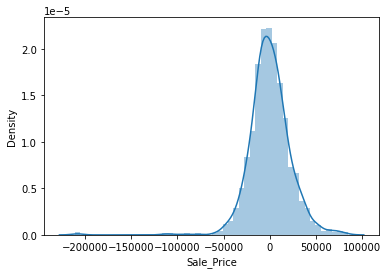

In [118]:
sns.distplot(error_train_pa)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

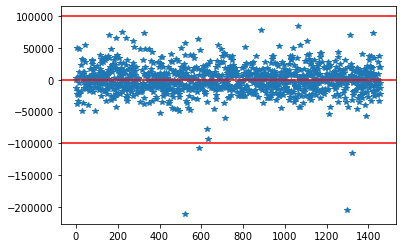

In [119]:
plt.plot(error_train_pa ,"*")# Scatter plot
plt.axhline(y= error_train_pa.mean(),color='r')
plt.axhline(y= 100000,color='r')
plt.axhline(y= -100000,color='r')
plt.show()  

In [120]:
pred_actual_pa = pd.DataFrame({"Pred" :pred_train_pa , "Actual" :pa_train_y})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

D:\Installation\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

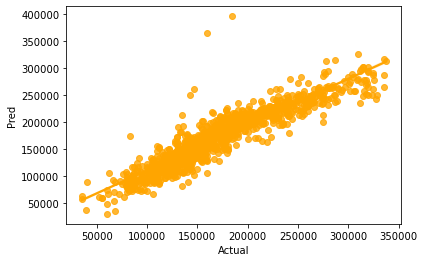

In [121]:
sns.regplot(pred_actual_pa['Actual'],pred_actual_pa['Pred'],color="Orange")

In [122]:
lm_pr.score(pa_train_x,pa_train_y)

0.8466114226066216

In [102]:
def remove_outliers(df, col, k=2):
    mean= df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x > mean-k*sd)]
    final_list=[x for x in final_list if (x < mean + k*sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print("Number of outliers removed-->", df.shape[0]-df1.shape[0])

In [103]:
pa.shape

(1459, 75)

In [106]:
remove_outliers(pa, 'Sale_Price', k=2)

(1396, 75)
Number of outliers removed--> 63


In [107]:
pa=df1

In [142]:
MSE_PA = np.mean(np.square(error_test_pa))
MSE_PA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

420566219.1519142

In [143]:
RMSE= np.sqrt(MSE_PA)
RMSE

<IPython.core.display.Javascript object>

20507.711211929873

In [144]:
MAPE_PA= np.round(np.mean(np.abs(error_test_pa*100/ pa_test_y)))
MAPE_PA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10.0

In [145]:
ACC =100 - MAPE_PA
ACC

90.0

In [150]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [148]:
print("mean_absolute_error : ",mean_absolute_error(pa_test_y , pred_test_pa))

mean_absolute_error :  15616.725321450025


In [152]:
print('Root mean_squared_error : ',mean_squared_error(pa_test_y , pred_test_pa,squared=False))

Root mean_squared_error :  20507.71121192987


In [154]:
#from sklearn.metrics import mean_absolute_percentage_error

In [45]:
lcn_x= lcn.iloc[:,1:]
lcn_y= lcn.iloc[:,0]

In [46]:
lcn_x1 = lcn_x

In [47]:
lcn_x = np.array(lcn_x)
lcn_y = np.array(lcn_y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
lcn_x

array([[ 6. , 62.1,  0. ,  1. ,  0. ],
       [18. , 74.7,  1. ,  0. ,  0. ],
       [16. , 69.7,  0. ,  0. ,  1. ],
       ...,
       [11. , 60.5,  1. ,  0. ,  0. ],
       [15. , 64.9,  0. ,  0. ,  0. ],
       [10. , 67.7,  0. ,  1. ,  0. ]])

In [54]:
lcn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    int32  
 4   Gender     725 non-null    int32  
 5   Caesarean  725 non-null    int32  
dtypes: float64(2), int32(3), int64(1)
memory usage: 25.6 KB


In [48]:
from boruta import BorutaPy


In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [51]:
boruta_feature_selector = BorutaPy(rfc, max_iter=25, verbose=2)

boruta_feature_selector.fit(lcn_x, lcn_y)

ValueError: Please check your X and y variable. The providedestimator cannot be fitted to your data.
Unknown label type: 'continuous'